In [1]:
# Data source

# Rice (Cammeo and Osmancik) [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5MW4Z.


In [12]:
# Imports

import numpy as np
from matplotlib import pyplot as plt
from scipy.io import arff
import pandas as pd

# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, \
    precision_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [3]:
# Get data from csv file

rice_data = arff.loadarff("Data/Rice_Cammeo_Osmancik.arff")
rice_data = pd.DataFrame(rice_data[0])

print(rice_data)

         Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   
3809  11434.0  404.709991         161.079269          90.868195      0.825692   

      Convex_Area    Extent

In [4]:
# Encode Class data

rice_data['Class'] = LabelEncoder().fit_transform(rice_data['Class'])
print (rice_data['Class'])

0       0
1       0
2       0
3       0
4       0
       ..
3805    1
3806    1
3807    1
3808    1
3809    1
Name: Class, Length: 3810, dtype: int64


In [5]:
# Split test data from training data (20%)

training_data, test_data = train_test_split(rice_data, test_size = 0.2, random_state = 0)

print(rice_data.size)
print(training_data.size)
print(test_data.size)

30480
24384
6096


In [6]:
# create decision tree

random_forest = RandomForestClassifier()

# training data
features_train = training_data.drop('Class', axis=1)

# Target data
target_train = training_data['Class']

# fit data to random forest by splitting the values (data for testing, actual result)
random_forest.fit(features_train, target_train)

RandomForestClassifier()

Accuracy:   1.0
precision:  1.0
Recall:     1.0
F1-Score:   1.0


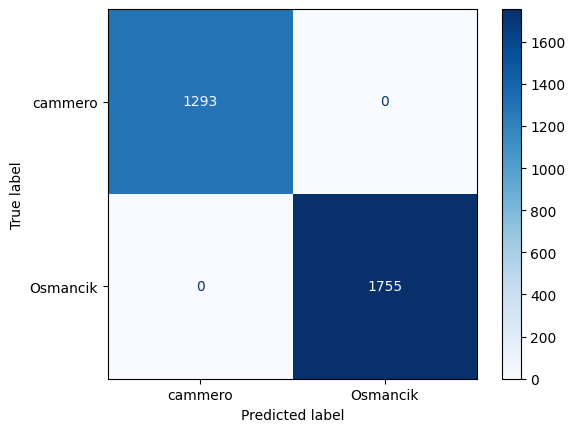

In [47]:
# Show confusion matrix for training data

actual = target_train
prediction = random_forest.predict(features_train)

#create confusion matrix using the actual and predicted results
cm = confusion_matrix(actual, prediction)

display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["cammero", "Osmancik"])
print("Accuracy:  ", accuracy_score(prediction, actual))
print("precision: ", precision_score(prediction, actual))
print("Recall:    ", recall_score(prediction, actual))
print("F1-Score:  ", f1_score(prediction, actual))

display.plot(cmap='Blues')

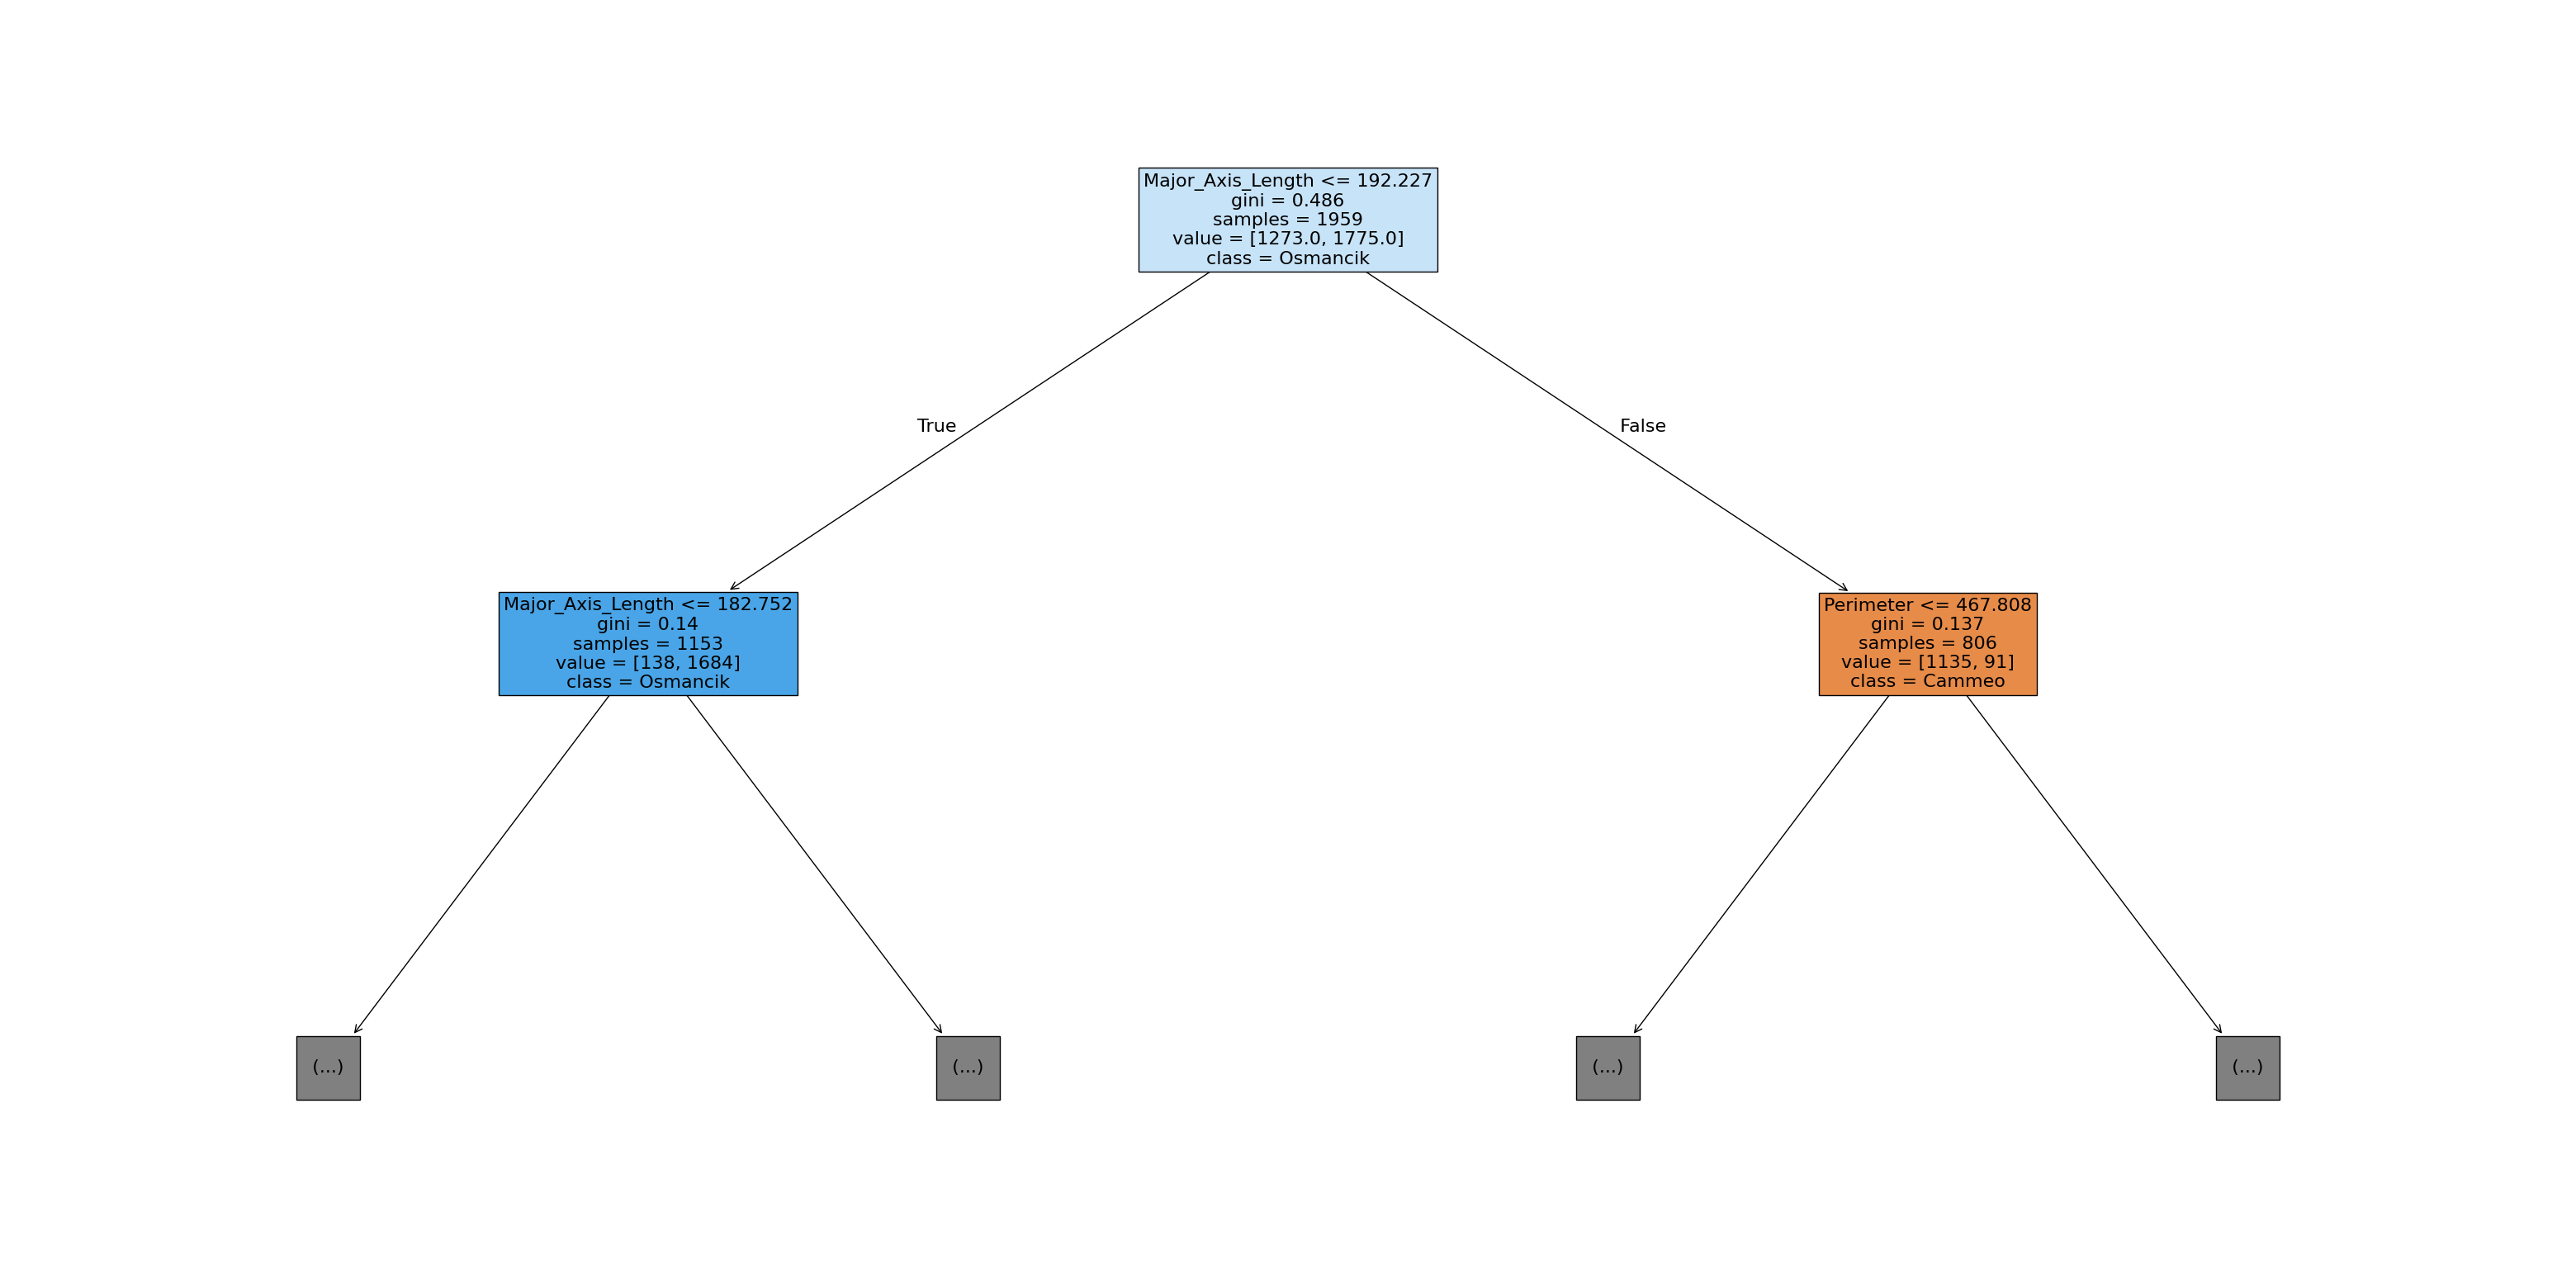

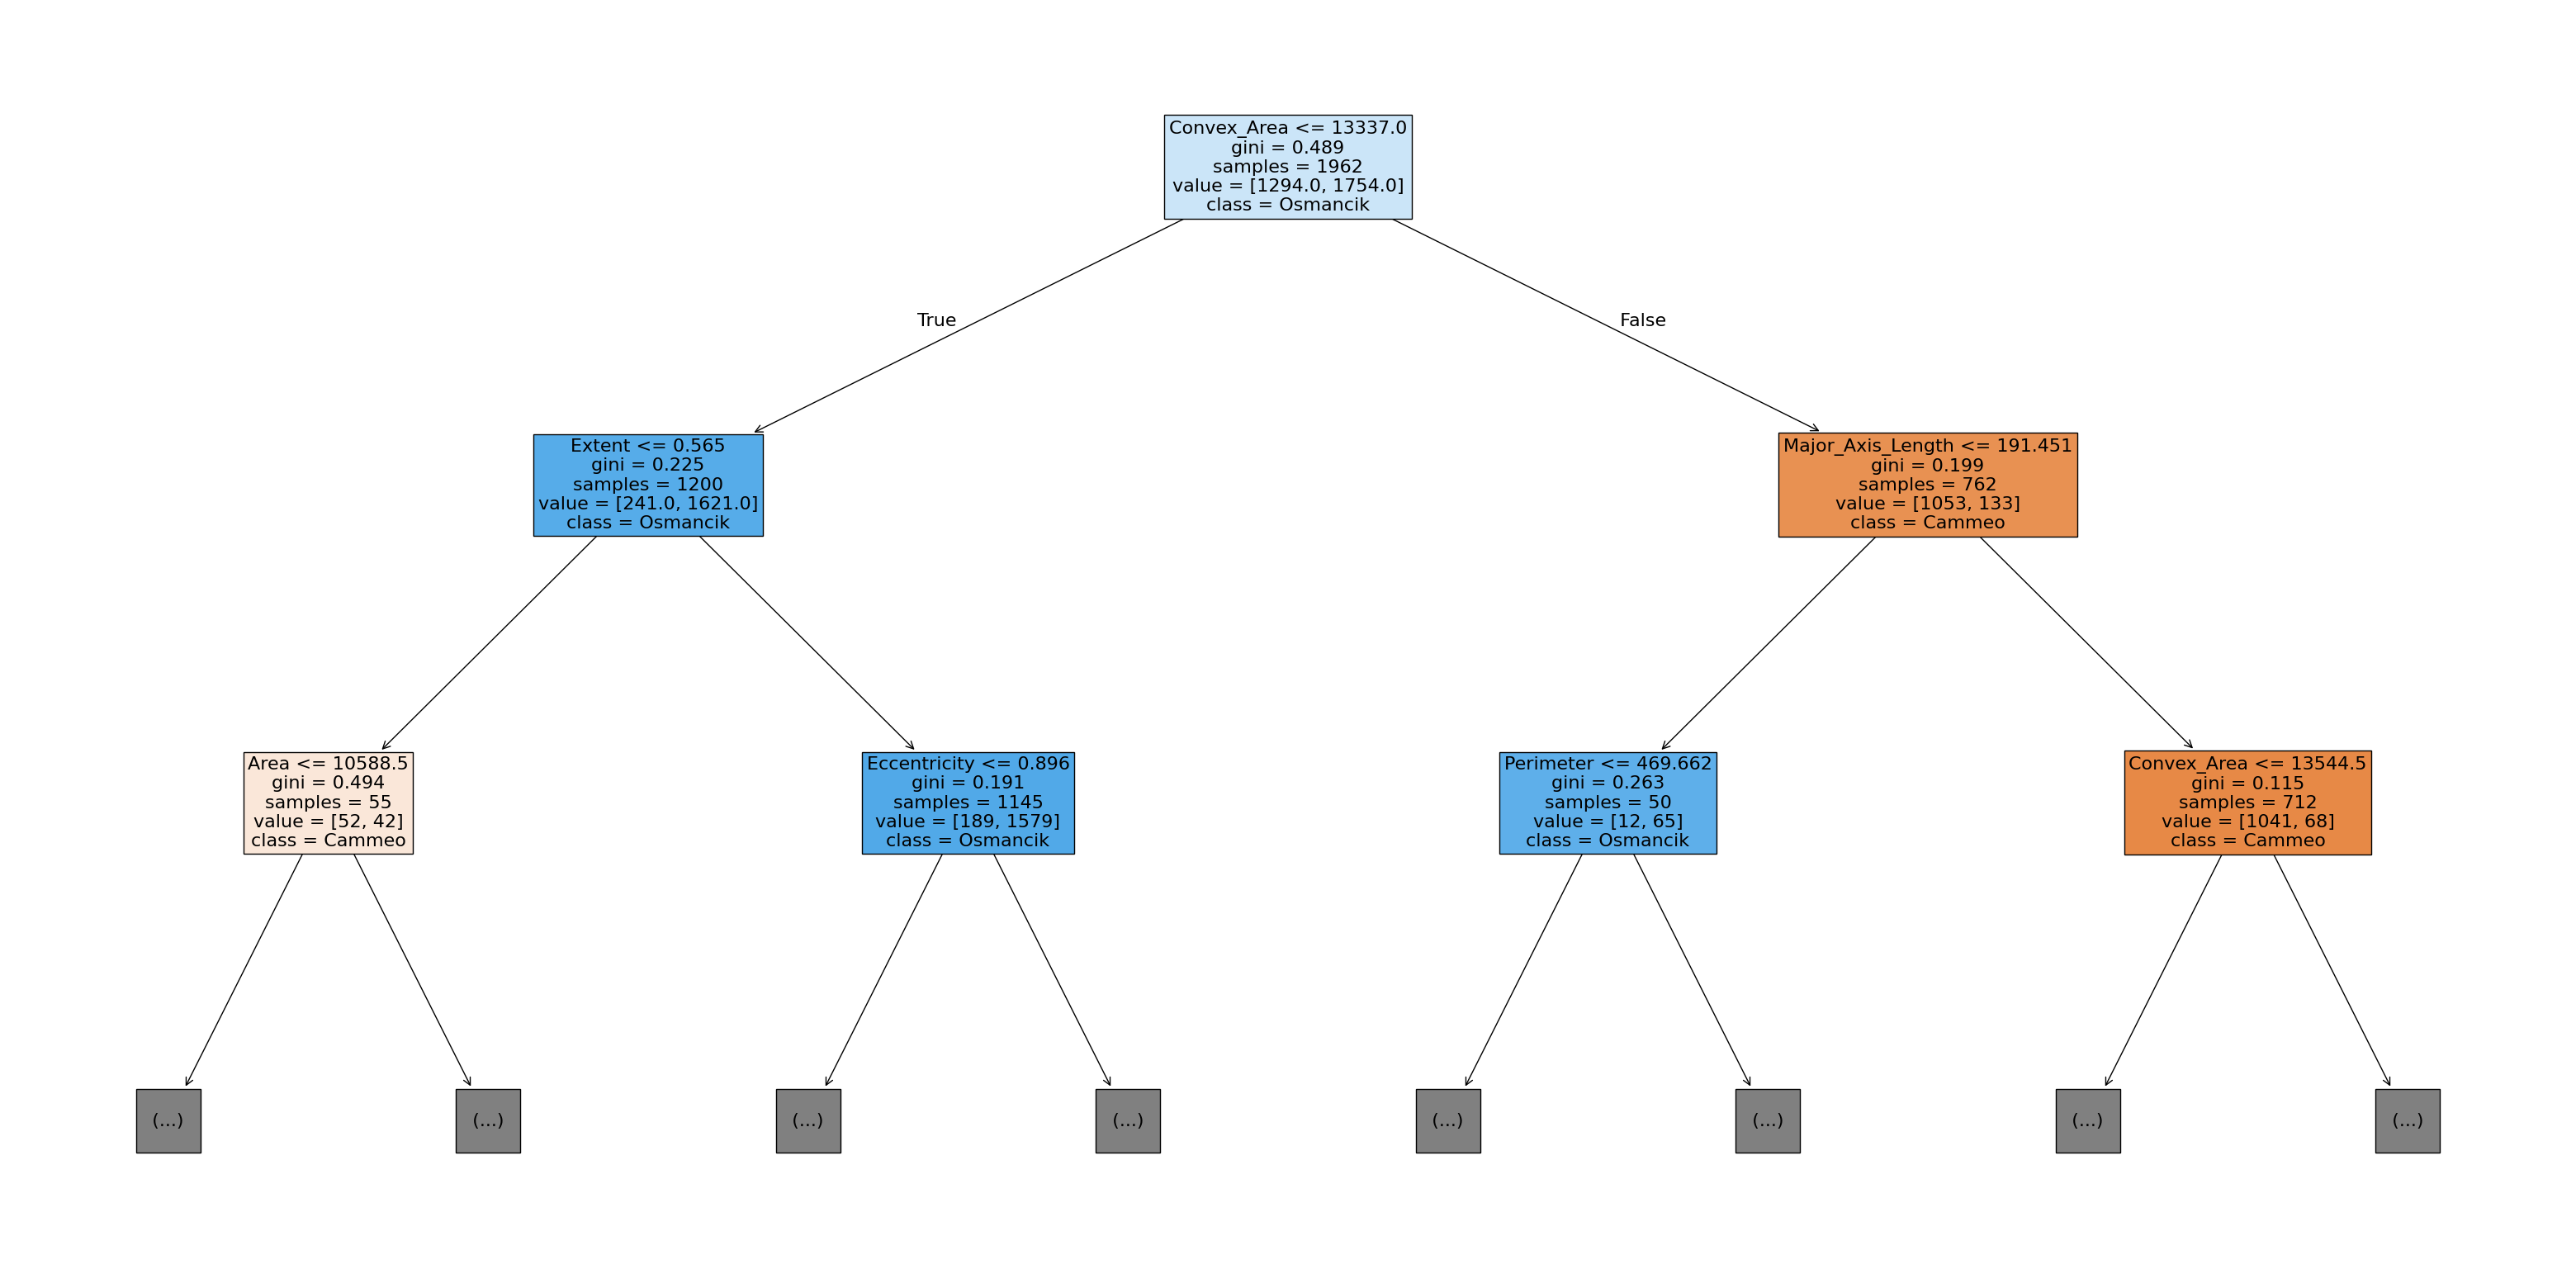

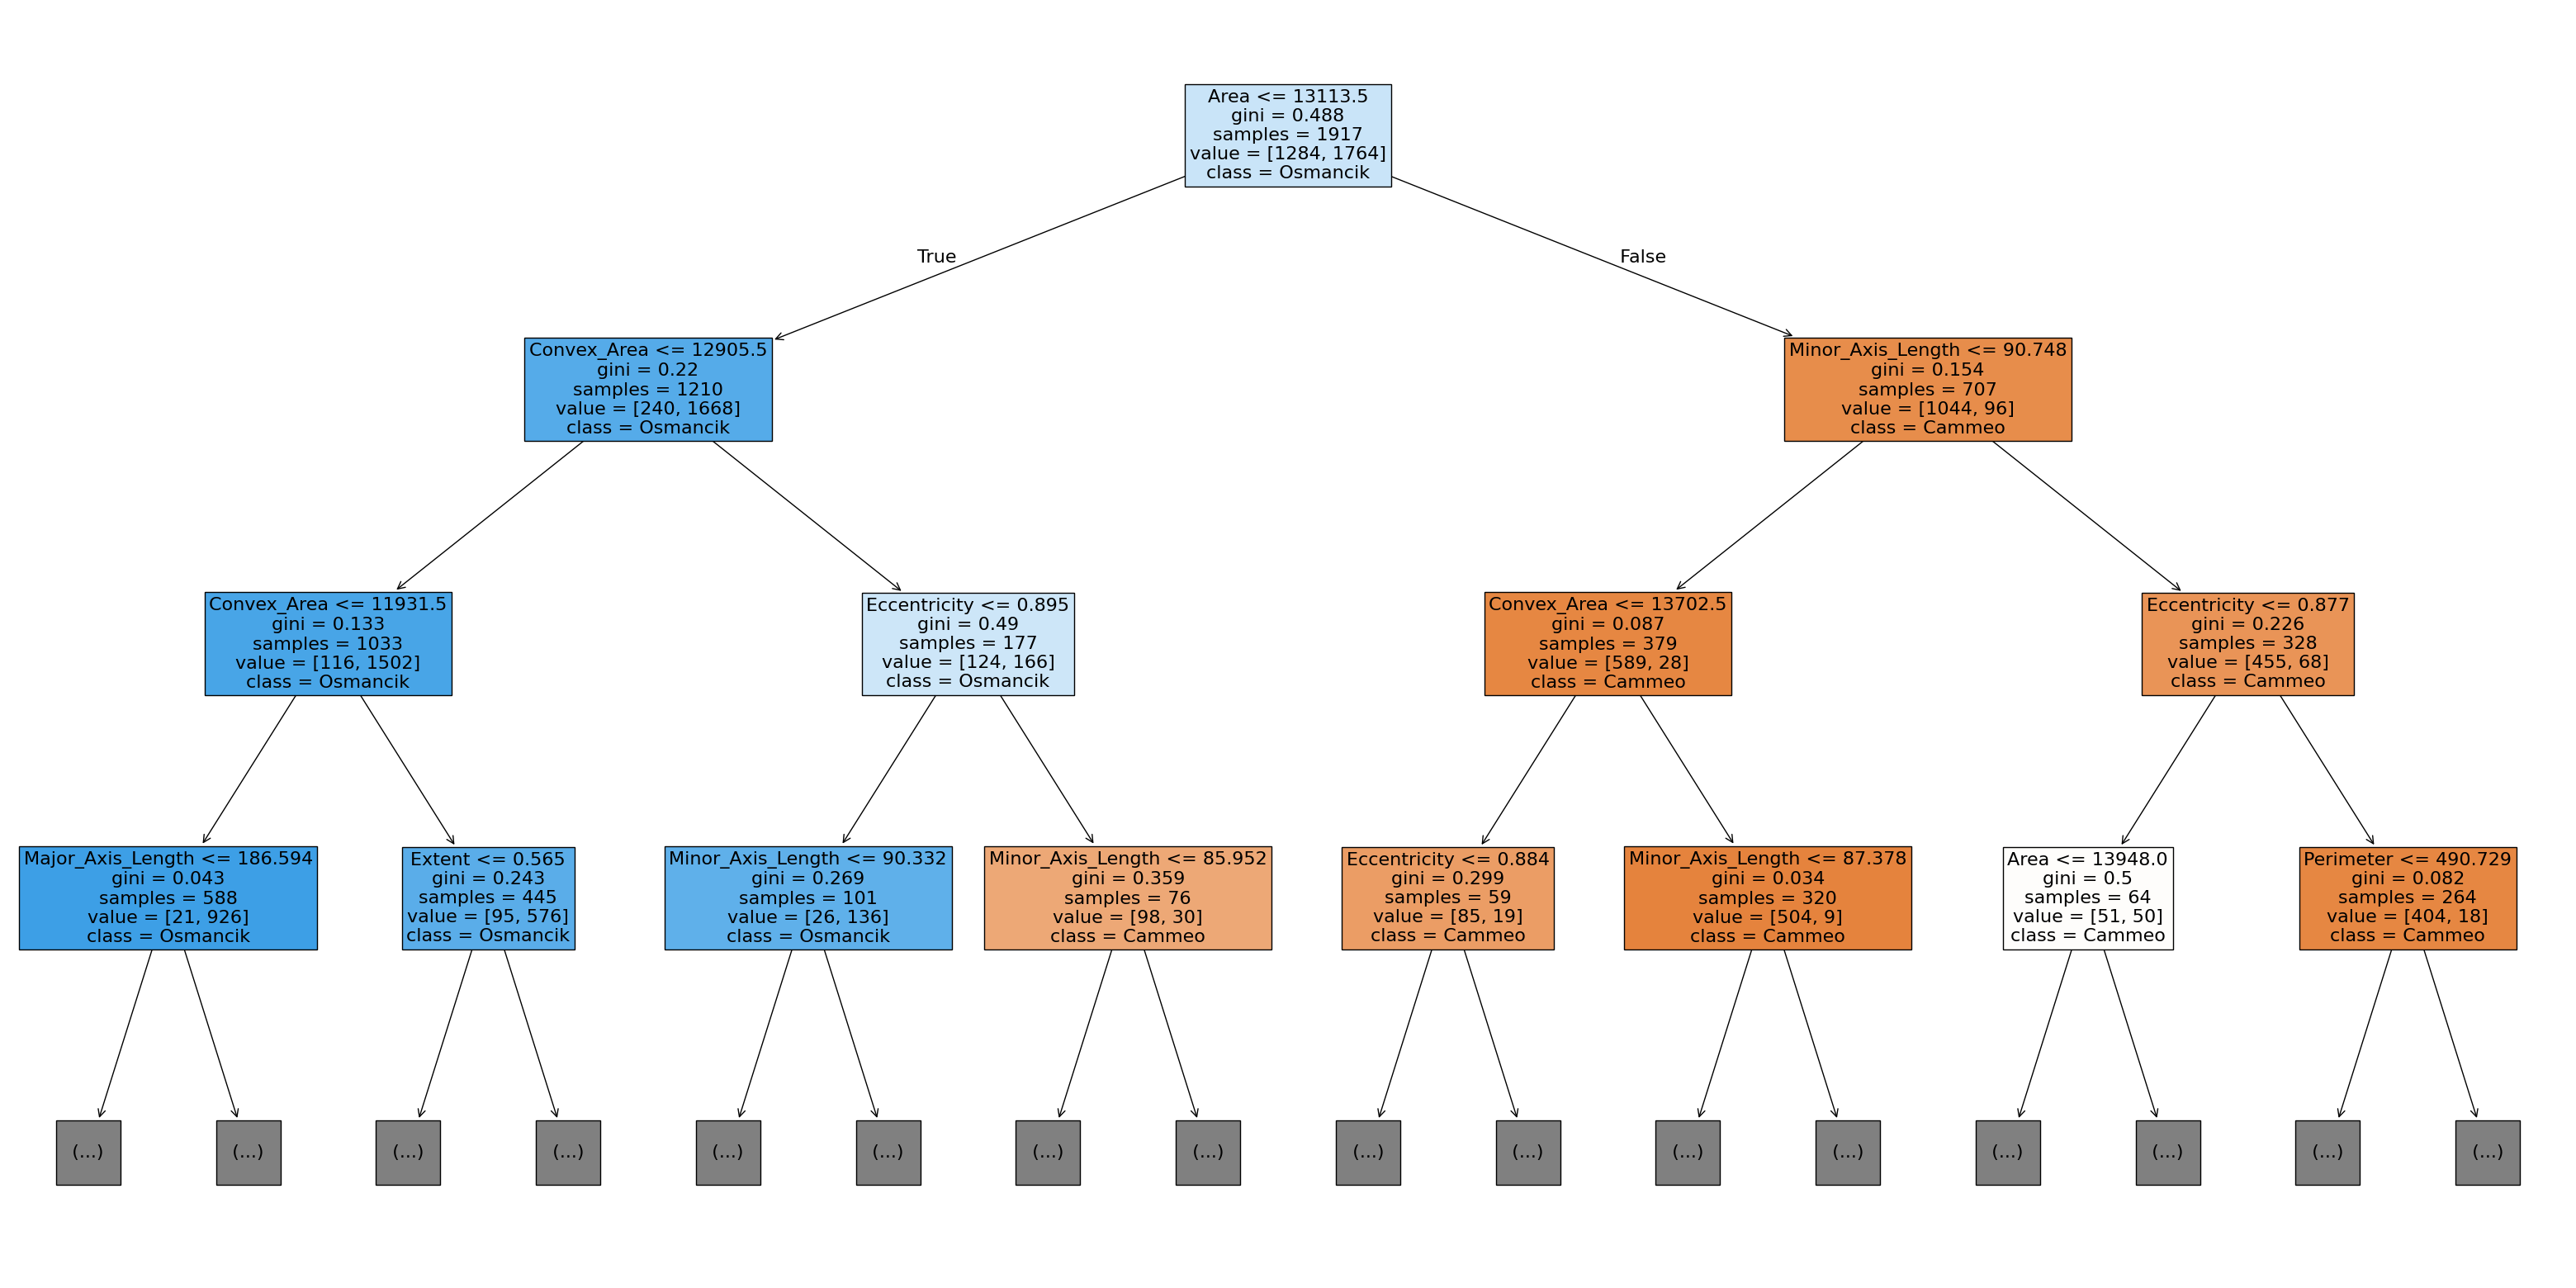

In [46]:
# Show first 3 decision trees with more detail each time from random forest
for i in range(3):
    plt.figure(figsize = (40,20))
    plot_tree(random_forest[i], filled=True, max_depth= i+1, fontsize=16, class_names=['Cammeo', 'Osmancik'], feature_names=rice_data.columns)
    plt.show()

Accuracy:   0.9278215223097113
precision:  0.9482352941176471
Recall:     0.9243119266055045
F1-Score:   0.9361207897793263


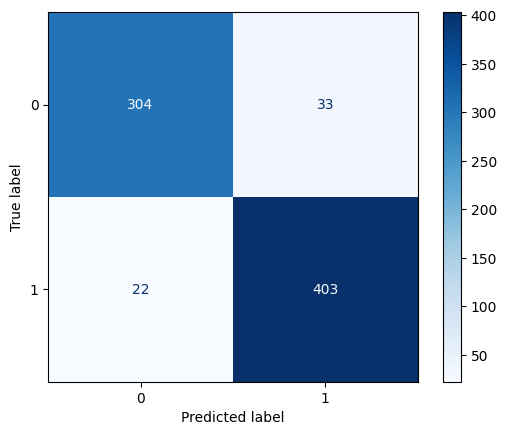

In [43]:
# Show confusion matrix for test data

actual = test_data['Class']
prediction = random_forest.predict(test_data.drop('Class', axis=1))

#create confusion matrix using the actual and predicted results
cm = confusion_matrix(actual, prediction)

display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["cammero", "Osmancik"])
print("Accuracy:  ", accuracy_score(prediction, actual))
print("precision: ", precision_score(prediction, actual))
print("Recall:    ", recall_score(prediction, actual))
print("F1-Score:  ", f1_score(prediction, actual))

display.plot(cmap='Blues')